<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> WN --- X --- y

#     
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Libraries

In [1]:
import time, pickle
import pyts
import numpy  as np
from   numpy import mean, std, expand_dims

import pandas as pd
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',None)

from matplotlib import pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True)
 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
from sklearn.preprocessing   import LabelEncoder, StandardScaler, MinMaxScaler 

from sklearn.metrics         import accuracy_score, recall_score, precision_score
from sklearn.metrics         import classification_report, ConfusionMatrixDisplay

import warnings 
warnings.filterwarnings('ignore') 
 

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Estimated Column

In [7]:
estimated_column = pickle.load( open('estimated_column','rb') )  # load

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> X & y

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Load X & y

In [2]:
Xy_Train = pickle.load( open('X_Train_Scaled' ,'rb') )  # load
y_Train  = pickle.load( open('y_Train_Encoded','rb') )  # load

Xy_Valid = pickle.load( open('X_Valid_Scaled' ,'rb') )  # load
y_Valid  = pickle.load( open('y_Valid_Encoded','rb') )  # load

Xy_Test  = pickle.load( open('X_Test_Scaled'  ,'rb') )  # load
y_Test   = pickle.load( open('y_Test_Encoded' ,'rb') )  # load

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> select balanced data (optional)

In [3]:
#Xy_Train = pickle.load( open('X_Train_Balanced','rb') )  # load
#y_Train  = pickle.load( open('y_Train_Balanced','rb') )  # load 

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> y

In [4]:
y_Train = expand_dims( y_Train, axis=1 )
y_Valid = expand_dims( y_Valid, axis=1 )
y_Test  = expand_dims( y_Test , axis=1 )

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Scaling y

In [5]:
MMS = MinMaxScaler().fit( y_Train )

pickle.dump( MMS ,  open('MMS_WN' ,'wb') )  # save
MMS  = pickle.load( open('MMS_WN' ,'rb') )  # load

y_Train = MMS.transform( y_Train )
y_Valid = MMS.transform( y_Valid )
y_Test  = MMS.transform( y_Test  )

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Xy

In [8]:
Xy_Train[ estimated_column ]  =  y_Train
Xy_Valid[ estimated_column ]  =  y_Valid
Xy_Test[  estimated_column ]  =  y_Test

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Series

In [9]:
def Reshape_Xy( Xy ):
    Series = [] 
    Range  = range(Xy.shape[0])
    for i in Range: 
        Series.append( expand_dims( Xy.loc[i,:], axis=1 ).tolist() )
    return np.array(Series)

Train_Series = Reshape_Xy( Xy_Train )
Valid_Series = Reshape_Xy( Xy_Valid )
Test_Series  = Reshape_Xy( Xy_Test  )

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> X & y

In [10]:
N = 1

def X_y( Xy_Series, N ):
    bSize  = Xy_Series.shape[0]
    nSteps = Xy_Series.shape[1]-N

    Y = np.empty(( bSize, nSteps, N ))  
    for step_ahead in range( 1, N+1 ):
        Y[ : , : , step_ahead-1 ] = Xy_Series[ : , step_ahead:step_ahead+nSteps, 0 ]

    X, y  =  Xy_Series[ :, :nSteps ], Y[ : ] 
    return X, y
  
X_Train, y_Train = X_y( Train_Series, N )
X_Valid, y_Valid = X_y( Valid_Series, N )
X_Test , y_Test  = X_y( Test_Series , N )

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Save

In [11]:
pickle.dump( X_Train,  open('X_Train_WN','wb') )  # save
pickle.dump( X_Valid,  open('X_Valid_WN','wb') )  # save
pickle.dump( X_Test ,  open('X_Test_WN' ,'wb') )  # save

pickle.dump( y_Train,  open('y_Train_WN','wb') )  # save
pickle.dump( y_Valid,  open('y_Valid_WN','wb') )  # save
pickle.dump( y_Test ,  open('y_Test_WN' ,'wb') )  # save

#####   

#####   

#####   

#####   

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> WaveNet Model

#     
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Libraries

In [1]:
import time, pickle
import pyts
import numpy  as np
from   numpy import mean, std, expand_dims

import pandas as pd
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',None)

from matplotlib import pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True)
 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
from sklearn.preprocessing   import LabelEncoder, StandardScaler, MinMaxScaler 

from sklearn.metrics         import accuracy_score, recall_score, precision_score
from sklearn.metrics         import classification_report, ConfusionMatrixDisplay

import warnings 
warnings.filterwarnings('ignore') 



import tensorflow         as   tf
from   tensorflow       import keras
from   keras.models     import Sequential
from   keras.layers     import InputLayer, Conv1D 

#from   keras.layers     import Dense, Dropout, Activation
#from   keras.metrics    import categorical_crossentropy
#from   keras.optimizers import Adam, SGD

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Classes

In [2]:
Classes = pickle.load( open('Classes' ,'rb') )  # load
Classes

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

#####  
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Load

In [3]:
X_Train = pickle.load( open('X_Train_WN','rb') )  # load
X_Valid = pickle.load( open('X_Valid_WN','rb') )  # load
X_Test  = pickle.load( open('X_Test_WN' ,'rb') )  # load

y_Train = pickle.load( open('y_Train_WN','rb') )  # load
y_Valid = pickle.load( open('y_Valid_WN','rb') )  # load
y_Test  = pickle.load( open('y_Test_WN' ,'rb') )  # load

MMS     = pickle.load( open('MMS_WN'    ,'rb') )  # load

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Functions

In [4]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

def Make_Pred( X, y, Scaler, model ):
    TRUE = list( y[:,-1,0] )
    TRUE = expand_dims( TRUE, axis=1 ).tolist()
    TRUE = Scaler.inverse_transform( TRUE ) 
    TRUE = np.round( TRUE ).tolist()

    Min, Max = min(TRUE), max(TRUE)

    PRED = model.predict( X )
    PRED = list( PRED[:,-1,0] )
    PRED = expand_dims( PRED, axis=1 ).tolist()
    PRED = Scaler.inverse_transform( PRED ) 
    PRED = np.round( PRED ).tolist()

    for i in range(len(PRED)):
        if   PRED[i] < Min: PRED[i] = Min
        elif PRED[i] > Max: PRED[i] = Max
            
    RES = np.array(TRUE) - np.array(PRED)
    STD = np.std( RES )
    
    return [ TRUE, PRED, STD ]

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> New Model

In [5]:
New_Model = False

Rates     = (1, 2, 4, 8, 16, 32, 64, 128) * 2
n_neurons = 24   # max( [50,2*N] )

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Create or Load

In [6]:
# (3) Best   WaveNet 
    
if  New_Model == True:
    
    N         = 1
    n_neurons = n_neurons

    model = Sequential()
    model.add( keras.layers.InputLayer(input_shape=[None, 1]) )

    for rate in Rates:
        model.add( keras.layers.Conv1D( filters       =  n_neurons   # default is 20
                                      , kernel_size   =   2
                                      , padding       = "causal"
                                      , activation    = "relu"
                                      , dilation_rate =  rate
                                      ))

    model.add( keras.layers.Conv1D(     filters       =  N   # default is 10
                                      , kernel_size   =  1    ))

    pickle.dump( model, open('model_WN','wb') )  # save
    print('Model Created')
    
    Version_Bank = []
    pickle.dump( Version_Bank, open('Version_Bank','wb') )  # save
    print( 'Version_Bank Created' )
    
    print('No Weights to Load') 
    
    SD_Bank = pd.DataFrame(columns = [ 'Train_SD', 'Valid_SD', 'Test_SD' ])
    print('SD_Bank Created')
    
    New_Model = False
    
    
    
else:
    
    try:
        model = pickle.load( open('model_WN','rb') )  # load
        print('Model Loaded')
    except:
        pass
    try:
        Version_Bank = pickle.load( open('Version_Bank','rb') )  # load
        print( 'Version_Bank Loaded' ) 
    except:
        pass
    try:
        model.load_weights( Version_Bank[-1]
                          , by_name       = False 
                          , skip_mismatch = False 
                          , options       = None 
                          )
        print('Weights Loaded for version: ', Version_Bank[-1] )
    except:
        pass
    try:
        SD_Bank = pickle.load( open('SD_Bank','rb') )  # load
        print( 'SD_Bank Loaded' )
    except:
        pass        

Model Loaded
Version_Bank Loaded
Weights Loaded for version:  14
SD_Bank Loaded


#####    

#####    

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Training (Iterate)

Epoch 1/10
592/592 [==============================] - 29s 40ms/step - loss: 0.0309 - last_time_step_mse: 0.0328 - val_loss: 0.0324 - val_last_time_step_mse: 0.0360
Epoch 2/10
592/592 [==============================] - 22s 38ms/step - loss: 0.0310 - last_time_step_mse: 0.0327 - val_loss: 0.0322 - val_last_time_step_mse: 0.0358
Epoch 3/10
592/592 [==============================] - 26s 44ms/step - loss: 0.0308 - last_time_step_mse: 0.0321 - val_loss: 0.0323 - val_last_time_step_mse: 0.0353
Epoch 4/10
592/592 [==============================] - 24s 41ms/step - loss: 0.0310 - last_time_step_mse: 0.0321 - val_loss: 0.0320 - val_last_time_step_mse: 0.0355
Epoch 5/10
592/592 [==============================] - 25s 43ms/step - loss: 0.0310 - last_time_step_mse: 0.0326 - val_loss: 0.0322 - val_last_time_step_mse: 0.0360
Epoch 6/10
592/592 [==============================] - 25s 42ms/step - loss: 0.0310 - last_time_step_mse: 0.0327 - val_loss: 0.0325 - val_last_time_step_mse: 0.0381
Epoch 7/10
592/5

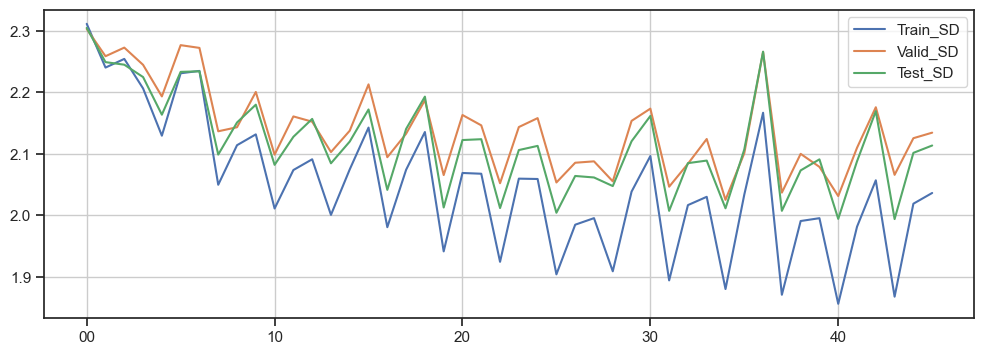

Epoch 1/10
592/592 [==============================] - 29s 41ms/step - loss: 0.0301 - last_time_step_mse: 0.0297 - val_loss: 0.0316 - val_last_time_step_mse: 0.0343
Epoch 2/10
592/592 [==============================] - 24s 41ms/step - loss: 0.0298 - last_time_step_mse: 0.0291 - val_loss: 0.0316 - val_last_time_step_mse: 0.0339
Epoch 3/10
592/592 [==============================] - 24s 40ms/step - loss: 0.0298 - last_time_step_mse: 0.0288 - val_loss: 0.0316 - val_last_time_step_mse: 0.0341
Epoch 4/10
592/592 [==============================] - 24s 41ms/step - loss: 0.0297 - last_time_step_mse: 0.0287 - val_loss: 0.0316 - val_last_time_step_mse: 0.0337
Epoch 5/10
592/592 [==============================] - 24s 40ms/step - loss: 0.0297 - last_time_step_mse: 0.0285 - val_loss: 0.0315 - val_last_time_step_mse: 0.0344
Epoch 6/10
592/592 [==============================] - 24s 40ms/step - loss: 0.0297 - last_time_step_mse: 0.0285 - val_loss: 0.0315 - val_last_time_step_mse: 0.0340
Epoch 7/10
592/5

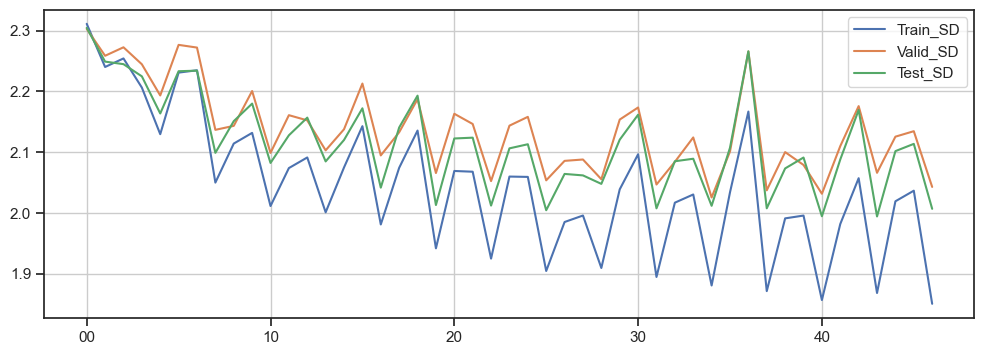

Epoch 1/3
592/592 [==============================] - 35s 44ms/step - loss: 0.0306 - last_time_step_mse: 0.0312 - val_loss: 0.0320 - val_last_time_step_mse: 0.0357
Epoch 2/3
592/592 [==============================] - 25s 42ms/step - loss: 0.0307 - last_time_step_mse: 0.0316 - val_loss: 0.0321 - val_last_time_step_mse: 0.0357
Epoch 3/3
592/592 [==============================] - 25s 42ms/step - loss: 0.0308 - last_time_step_mse: 0.0317 - val_loss: 0.0322 - val_last_time_step_mse: 0.0358

Weights Saved

Version_Bank Updates

106/106 [==============================] - 1s 10ms/step
SD_Bank Updated



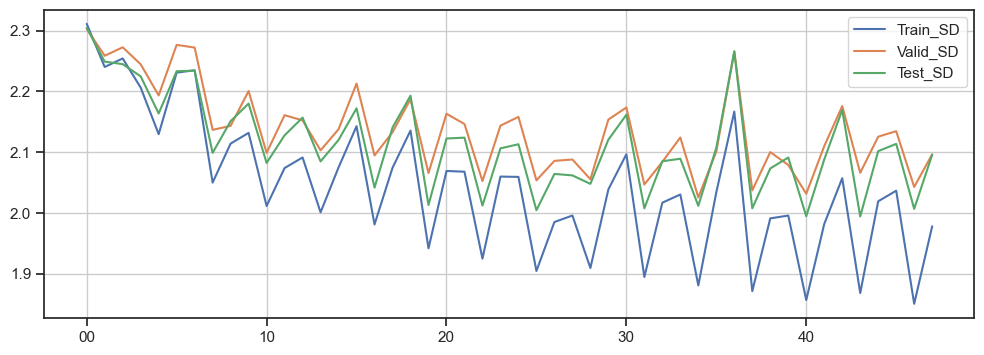

Epoch 1/10
592/592 [==============================] - 30s 42ms/step - loss: 0.0309 - last_time_step_mse: 0.0330 - val_loss: 0.0322 - val_last_time_step_mse: 0.0357
Epoch 2/10
592/592 [==============================] - 24s 40ms/step - loss: 0.0308 - last_time_step_mse: 0.0320 - val_loss: 0.0324 - val_last_time_step_mse: 0.0366
Epoch 3/10
592/592 [==============================] - 26s 43ms/step - loss: 0.0309 - last_time_step_mse: 0.0326 - val_loss: 0.0321 - val_last_time_step_mse: 0.0363
Epoch 4/10
592/592 [==============================] - 24s 41ms/step - loss: 0.0307 - last_time_step_mse: 0.0320 - val_loss: 0.0322 - val_last_time_step_mse: 0.0364
Epoch 5/10
592/592 [==============================] - 24s 41ms/step - loss: 0.0309 - last_time_step_mse: 0.0323 - val_loss: 0.0324 - val_last_time_step_mse: 0.0360
Epoch 6/10
592/592 [==============================] - 24s 41ms/step - loss: 0.0308 - last_time_step_mse: 0.0324 - val_loss: 0.0326 - val_last_time_step_mse: 0.0409
Epoch 7/10
592/5

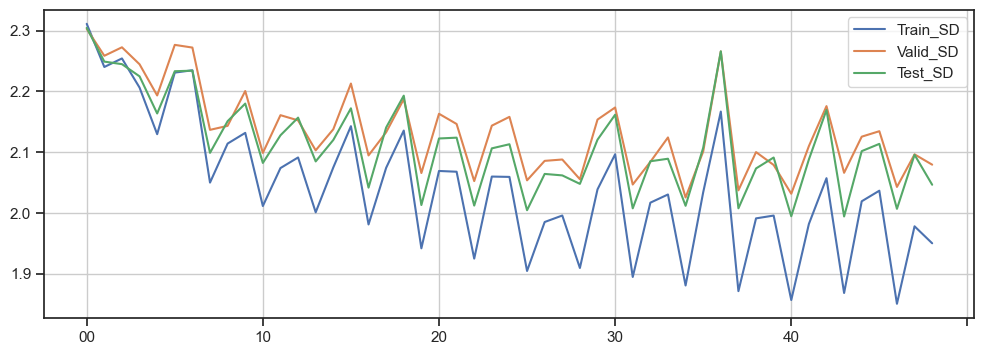

Epoch 1/10
592/592 [==============================] - 32s 45ms/step - loss: 0.0301 - last_time_step_mse: 0.0298 - val_loss: 0.0316 - val_last_time_step_mse: 0.0346
Epoch 2/10
592/592 [==============================] - 25s 42ms/step - loss: 0.0298 - last_time_step_mse: 0.0290 - val_loss: 0.0315 - val_last_time_step_mse: 0.0342
Epoch 3/10
592/592 [==============================] - 24s 41ms/step - loss: 0.0297 - last_time_step_mse: 0.0287 - val_loss: 0.0316 - val_last_time_step_mse: 0.0346
Epoch 4/10
592/592 [==============================] - 25s 42ms/step - loss: 0.0297 - last_time_step_mse: 0.0287 - val_loss: 0.0315 - val_last_time_step_mse: 0.0343
Epoch 5/10
592/592 [==============================] - 25s 42ms/step - loss: 0.0296 - last_time_step_mse: 0.0285 - val_loss: 0.0315 - val_last_time_step_mse: 0.0338
Epoch 6/10
592/592 [==============================] - 25s 42ms/step - loss: 0.0296 - last_time_step_mse: 0.0283 - val_loss: 0.0315 - val_last_time_step_mse: 0.0342
Epoch 7/10
592/5

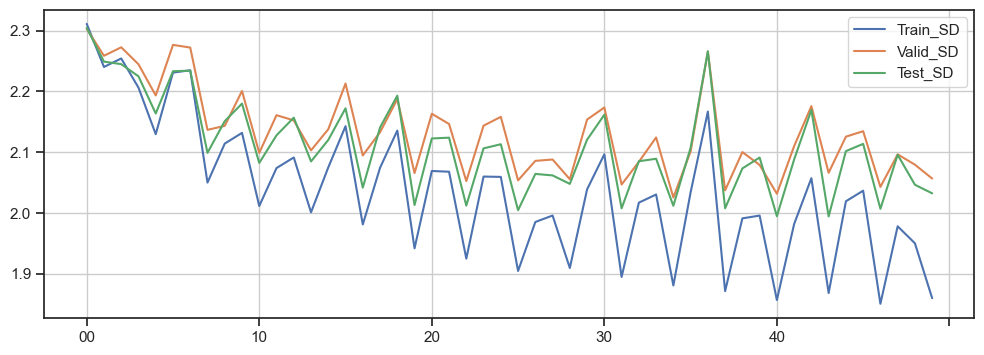

Epoch 1/3
592/592 [==============================] - 38s 46ms/step - loss: 0.0306 - last_time_step_mse: 0.0315 - val_loss: 0.0320 - val_last_time_step_mse: 0.0352
Epoch 2/3
592/592 [==============================] - 26s 44ms/step - loss: 0.0307 - last_time_step_mse: 0.0314 - val_loss: 0.0320 - val_last_time_step_mse: 0.0353
Epoch 3/3
592/592 [==============================] - 26s 44ms/step - loss: 0.0307 - last_time_step_mse: 0.0318 - val_loss: 0.0318 - val_last_time_step_mse: 0.0352

Weights Saved

Version_Bank Updates

106/106 [==============================] - 1s 9ms/step
SD_Bank Updated



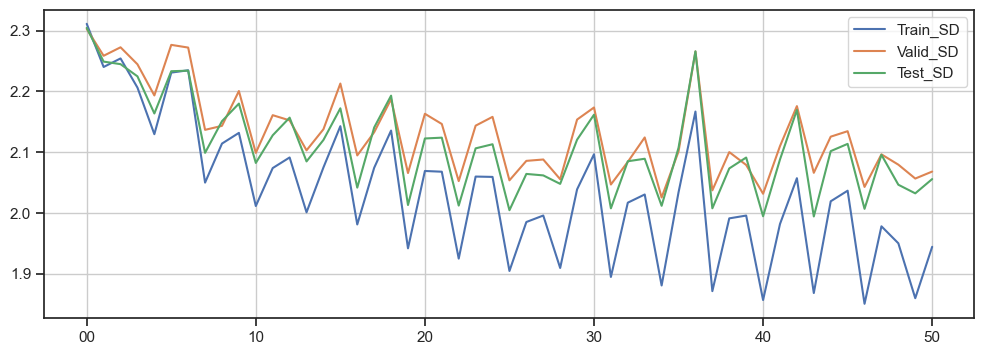

In [30]:
# Load Weights
try:
    model.load_weights( Version_Bank[-1]
                      , by_name       = False 
                      , skip_mismatch = False 
                      , options       = None 
                      )
except:
    pass


# Iterate
for i in range( 6 ):
    
    n     = len(Version_Bank) % 3
    OPT   = [ 'adam', 'adamax', 'nadam']
    EPOCH = [ 10, 10, 3 ]


    model.compile( loss      = "mse"
                 , optimizer = OPT[ n ]
                 , metrics   = [last_time_step_mse]
                 )
    history = model.fit( X_Train, y_Train
                       , epochs          = EPOCH[ n ]
                       , validation_data = (X_Valid, y_Valid)
                       )


    # plotting loss & metrics
    #losses = pd.DataFrame( model.history.history )
    #losses.plot(figsize=(12,4)).grid(True)
    ##plt.gca().set_ylim(0.04,0.06); 
    #plt.show()


    # Save Weights
    if len(Version_Bank) < 10:   version_name = '0' + str( len(Version_Bank) )
    else:                        version_name =       str( len(Version_Bank) )
    #import time; version_name=time.strftime('%Y_%m_%d_%H_%M_%S')
    model.save_weights( version_name
                      , overwrite   = True 
                      , save_format = None 
                      , options     = None 
                      )
    print( '\nWeights Saved' )


    # Update Version_Bank
    Version_Bank.append( version_name )
    pickle.dump( Version_Bank ,  open('Version_Bank','wb') )  # save
    Version_Bank  = pickle.load( open('Version_Bank','rb') )  # load
    print( '\nVersion_Bank Updates\n' )


    # Update SD_Bank
    _, _, Train_STD = Make_Pred( X_Train, y_Train, MMS, model )
    _, _, Valid_STD = Make_Pred( X_Valid, y_Valid, MMS, model )
    _, _, Test_STD  = Make_Pred( X_Test , y_Test , MMS, model )
    SD_Bank.loc[version_name,:] = [ Train_STD, Valid_STD, Test_STD ]
    SD_Bank.sort_index( axis=0, level=None, ascending=True, inplace=True, kind='quicksort',
                        na_position='last', sort_remaining=True, ignore_index=False, key=None )
    pickle.dump( SD_Bank ,  open('SD_Bank','wb') )  # save
    SD_Bank  = pickle.load( open('SD_Bank','rb') )  # load
    print( 'SD_Bank Updated\n' )


    # Plot SD_Bank
    SD_Bank.plot(figsize=(12,4)).grid(True)
    #plt.gca().set_ylim(0.04,.06); 
    plt.show()
    

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Re-Iterate

#####   

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Plot SD_Bank

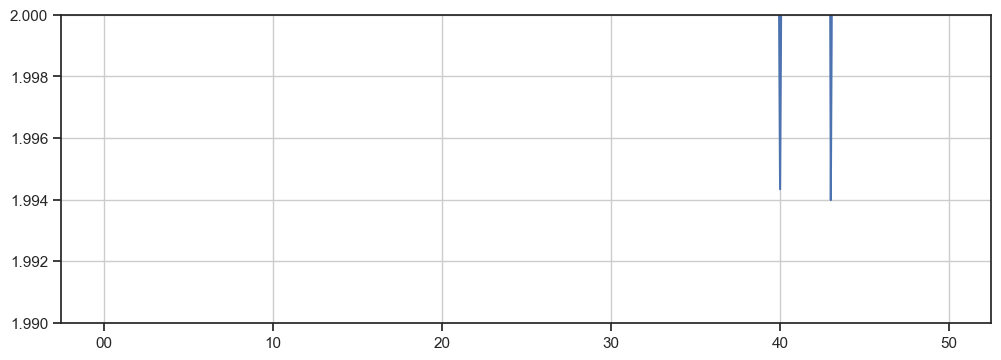

In [31]:
SD_Bank['Test_SD'].plot(figsize=(12,4)).grid(True)
plt.gca().set_ylim(1.99,2.00); 
plt.savefig( 'SD_Bank.png', dpi=120 )
plt.show()

#####   

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Load Weights

106/106 [==============================] - 1s 10ms/step





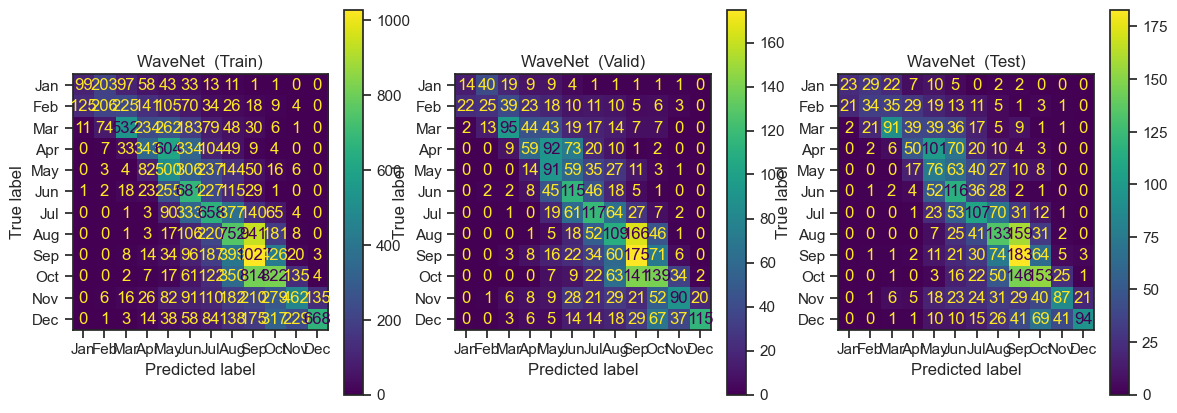

In [32]:
# Load Weights
model.load_weights( Version_Bank[43]
                  , by_name       = False 
                  , skip_mismatch = False 
                  , options       = None 
                  )

Train, Train_Pred, _ = Make_Pred( X_Train, y_Train, MMS, model )
Valid, Valid_Pred, _ = Make_Pred( X_Valid, y_Valid, MMS, model )
Test , Test_Pred , _ = Make_Pred( X_Test , y_Test , MMS, model )
print('\n\n')

# CLF
CLF      =   model
CLF_Name = 'WaveNet' 

# Comparing CMs 
fig, ax = plt.subplots( 1, 3, figsize=(14,5) ) 

ax[0].set_title( CLF_Name+'  (Train)' )
ax[1].set_title( CLF_Name+'  (Valid)' )
ax[2].set_title( CLF_Name+'  (Test)'  )

ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix( Train, Train_Pred ), 
    display_labels   = Classes
    ).plot(ax=ax[0])

ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix( Valid, Valid_Pred ), 
    display_labels   = Classes
    ).plot(ax=ax[1])

ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix( Test , Test_Pred  ), 
    display_labels   = Classes
    ).plot(ax=ax[2]) 

plt.savefig( 'CM '+CLF_Name+' (Train_Valid_Test).png', dpi=360 )
plt.savefig( 'CM '+CLF_Name+' (Train_Valid_Test).pdf', dpi=360 )

plt.show()

#####   

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Best Version

In [33]:
Best_Version = Version_Bank[43]

pickle.dump( Best_Version,  open('Best_Version','wb') )  # save
Best_Version = pickle.load( open('Best_Version','rb') )  # load
Best_Version

'43'

#####   

#####   